### Transfer Learning, 전이 학습
- 이미지 분류 문제를 해결하는 데에 사용했던 모델을 다른 데이터세트 혹은 다른 문제에 적용시켜 해결하는 것을 의미한다.
- 즉, 사전에 학습된 모델을 다른 작업에 이용하는 것을 의미한다.
- Pretrained Model의 Convolutional Base 구조(Conv2D + Pooling)를 그대로 두고 분류기(FC)를 붙여서 학습시킨다.  
<sub>*기존 훈련 모델을 다른 모델로 생성하고 싶다면 전이 학습을 해야 한다.</sub>

<div style="display: flex; margin-left:-10px">
    <div>
        <img src="./images/transfer_learning01.png" width="150">
    </div>
    <div>
        <img src="./images/fc.png" width="600" style="margin-top: 10px; margin-left: 50px">
    </div>
</div>

- 사전 학습된 모델의 용도를 변경하기 위한 층별 미세 조정(fine tuning)은 데이터 세트의 크기와 유사성을 기반으로 고민하여 조정한다.
- 2018년 FAIR(Facebook AI Research)논문에서 실험을 통해 '전이학습이 학습 속도 면에서 효과가 있다'라는 것을 밝혀냈다.

<img src="./images/transfer_learning02.png" width="400" style="margin-left: -30px">
<sub>*시간에 따라 pre-train이 더 좋은 성능을 갖는 것을 알 수 있다.</sub>

In [1]:
from tensorflow.keras.applications import VGG16

# 사전 훈련 모델 생성
model = VGG16()
# 사전 훈련 모델 정보 확인
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
# 모델 확인
print('model: ', model)
# <Functional name=vgg16, built=True>
# name: vgg16, built: 모델 구축 여부 (True 시 이미 구축됨) 

# 모델의 아웃풋이 어떻게 되어있는지 확인 가능,sparse = 원핫 인코딩 여부
print('model output: ', model.output)

model:  <Functional name=vgg16, built=True>
model output:  <KerasTensor shape=(None, 1000), dtype=float32, sparse=False, name=keras_tensor_22>


In [3]:
# 이미지 및 배치 크기 지정
IMAGE_SIZE = 32
BATCH_SIZE = 64

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

# 사전 훈련 모델
# include_top: 분류기 포함 여부, weights: 'imagenet' 가중치를 사용 (처음부터 훈련하고 싶다면 가중치를 안 주면 된다.)됨
model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# 분류기

# output layer: 모델 출력 층 
# GlobalAveragePooling2D()(인풋)
# GlobalAveragePooling2D()(model.output)
x = model.output
 # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
x = GlobalAveragePooling2D()(x)
# Dense: 50개의 뉴런과 ReLU 활성화 함수 사용
x = Dense(50, activation='relu')(x)
# output layer: 10개의 뉴런과 소프트맥스 활성화 함수를 사용하여 클래스 확률 출력
output = Dense(10, activation='softmax')(x)

# 모델 생성: 입력과 출력을 지정하여 모델 정의
model = Model(inputs=model.input, outputs=output)
# 모델 요약
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          25,6

 Total params: 14,740,848 (56.23 MB)

 Trainable params: 14,740,848 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

# 이미지 변환 함수 선언
def transform(image):
    # 좌우 반전
    aug = A.HorizontalFlip(p=0.5)

    # Augmentor 객체로 이미지 변환
    return aug(image=image)['image']

# 내장 데이터 세트 불러오기
(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

# 검증용 데이터 세트 분리
train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

# 차원 제거 (1차원으로 변환)
train_targets = np.squeeze(train_targets)
validation_targets = np.squeeze(validation_targets)
test_targets = np.squeeze(test_targets)

# 크기 확인
print(train_images.shape, train_targets.shape)
print(validation_images.shape, validation_targets.shape)
print(test_images.shape, test_targets.shape)

# 이미지 전처리 진행
train_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

# 이미지 배치로 변환
# 이미지 및 레이블 데이터가 메모리에 미리 로드 시 flow 사용
# train만 shuffle을 사용하여 섞어주기
train_flow = train_generator.flow(train_images, train_targets, batch_size=BATCH_SIZE, shuffle=True)
validation_flow = validation_generator.flow(validation_images, validation_targets, batch_size=BATCH_SIZE)
test_flow = test_generator.flow(test_images, test_targets, batch_size=BATCH_SIZE)

(40000, 32, 32, 3) (40000,)
(10000, 32, 32, 3) (10000,)
(10000, 32, 32, 3) (10000,)


In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

# 모델 생성 함수 선언
# verbose 썸머리 출력 여부
def create_model(verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # include_top: 분류기 포함 여부, weights: 'imagenet' 가중치를 사용
    #  이미지 크기를 바로 받으면 input_shape 사용, 선언 후 받으면 input_tensor 사용
    # model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')
    model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # 분류기
    # output layer: 모델 출력 층 
    x = model.output
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # hidden layer: 50개의 뉴런과 ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)
    # output layer: 3개의 뉴런과 소프트맥스 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(10, activation='softmax')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=model.input, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
        
    return model

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# # weights 저장
# mcp_cb = ModelCheckpoint(
#     filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
#     monitor='val_loss',
#     save_best_only=False,
#     save_weights_only=True,
#     mode='min'
# )

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

# 모델 생성 함수를 사용하여 모델 생성
# verbose=True로 모델 요약 출력
model = create_model(verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy, metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,740,848 (56.23 MB)

 Trainable params: 14,740,848 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
import gc

# 메모리 해제 함수
# 불필요한 오브젝트를 지우는 작업
# 연삭 속도가 더 증가하며, 큰 연산을 하기 위한 준비 단계다.
gc.collect()

2754

In [9]:
# 모델 학습
history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE, 
                    epochs=10, 
                    validation_data=validation_flow, 
                    callbacks=[rlr_cb, ely_cb])

Epoch 1/10


C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 296ms/step - acc: 0.2088 - loss: 2.0284 - val_acc: 0.3848 - val_loss: 1.5087 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 309ms/step - acc: 0.4316 - loss: 1.4242 - val_acc: 0.5764 - val_loss: 1.1480 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 308ms/step - acc: 0.6198 - loss: 1.0648 - val_acc: 0.6824 - val_loss: 0.9162 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 303ms/step - acc: 0.7030 - loss: 0.8580 - val_acc: 0.7213 - val_loss: 0.8352 - learning_rate: 0.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 186s 298ms/step - acc: 0.7551 - loss: 0.7242 - val_acc: 0.7324 - val_loss: 0.7809 - learning_rate: 0.0010
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 305ms/step - acc: 0.7816 - loss: 0.6455 - val_acc: 0.7537 - val_loss: 0.7570 - learning_rate: 0.0010
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 310ms/step - acc: 0.8024 - loss: 0.5882 - val_acc: 0.7725 - val_loss: 0.6903 - learning_ra

In [10]:
# 평가
model.evaluate(test_flow)

157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - acc: 0.7925 - loss: 0.6701


[0.6764805316925049, 0.7907999753952026]

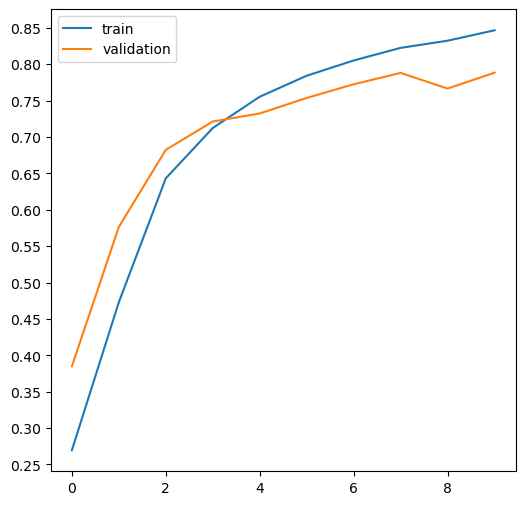

In [11]:
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [12]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

# 사전 훈련 모델 담기
model = VGG16()
# 이미지 불러오기
image = load_img('./datasets/hamster.jpg', target_size=(224, 224))
# numpy 배열로 변환
image = img_to_array(image)

# 차원 확장 (배열의 첫 번째 차원 확장)
image = np.expand_dims(image, axis=0)
# 이미지 예측
prediction = model.predict(image)
# 이미지 분류 모델의 예측 결과를 해석 함수
# 각 예측에 대해 가장 가능성 있는 클래스 레이블과 해당 확률을 반환
target = decode_predictions(prediction)

print(target)
# 높은 확률로 예측 된 것 가져오기
print(target[0][0])
# 가장 높게 예측된 이름과 확률 가져오기
print(target[0][0][1], f'{np.round(target[0][0][2] * 100, 4)}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
[[('n02342885', 'hamster', 0.4744362), ('n02441942', 'weasel', 0.17524551), ('n02442845', 'mink', 0.106843516), ('n02443484', 'black-footed_ferret', 0.07582153), ('n02443114', 'polecat', 0.032559898)]]
('n02342885', 'hamster', 0.4744362)
hamster 47.4436%
